In [ ]:
## 사주 조회 데이터 분석
1. 사주 접속 로그데이터를 읽어 들인다.
2. 접속 시간대 데이터를 확인한다.

In [1]:
# -*- coding: utf-8 -*-

In [2]:
import numpy as np
import pandas as pd

In [6]:
# 사주 접속로그 데이터 읽기
saju = pd.read_csv('saju.csv', encoding='cp949')

In [7]:
saju

,log_id,log_datetime,user_id,user_name,log_category_id,log_description,note,remote_addr,device_type,except
0,3,2017-11-10 08:35:14,NaN,NaN,NaN,aaa,NaN,NaN,NaN,NaN
1,4,2017-11-10 08:38:12,NaN,NaN,10.0,home....,NaN,192.0.0.1,NaN,NaN
2,5,2017-11-10 08:41:16,NaN,NaN,10.0,사주풀이 접속,NaN,192.0.0.1,NaN,NaN
3,6,2017-11-10 08:43:48,NaN,NaN,10.0,사주풀이 접속,NaN,221.151.112.190,NaN,NaN
4,7,2017-11-10 08:46:39,NaN,NaN,10.0,사주풀이 접속,NaN,221.151.112.190,NaN,0.0
5,8,2017-11-10 08:48:32,NaN,NaN,10.0,사주풀이 접속,NaN,221.151.112.190,NaN,0.0
6,9,2017-11-10 08:49:55,NaN,NaN,10.0,사주풀이 접속,NaN,221.151.112.190,NaN,0.0
7,10,2017-11-10 08:51:19,NaN,NaN,10.0,사주풀이 접속,NaN,221.151.112.190,1.0,0.0
8,11,2017-11-10 12:04:57,NaN,NaN,10.0,사주풀이 접속,NaN,175.121.133.141,NaN,0.0
9,12,2017-11-10 12:24:04,NaN,NaN,10.0,사주풀이 접속,NaN,175.121.133.141,NaN,0.0


In [10]:
saju['log_datetime'].shape

(18495,)

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

In [14]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

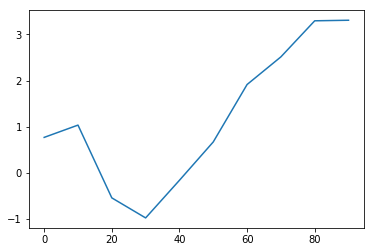

In [16]:
s.plot()

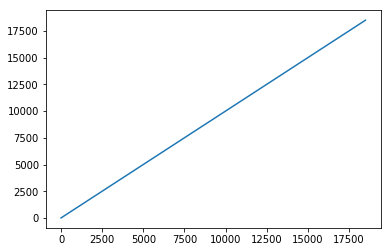

In [18]:
df = saju['log_id']
df.plot()